In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv('Air_Quality.csv')
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18862 entries, 0 to 18861
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       18862 non-null  int64  
 1   Indicator ID    18862 non-null  int64  
 2   Name            18862 non-null  object 
 3   Measure         18862 non-null  object 
 4   Measure Info    18862 non-null  object 
 5   Geo Type Name   18862 non-null  object 
 6   Geo Join ID     18862 non-null  int64  
 7   Geo Place Name  18862 non-null  object 
 8   Time Period     18862 non-null  object 
 9   Start_Date      18862 non-null  object 
 10  Data Value      18862 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(2), int64(3), object(7)
memory usage: 1.7+ MB


(None,
    Unique ID  Indicator ID                    Name Measure Measure Info  \
 0     336867           375  Nitrogen dioxide (NO2)    Mean          ppb   
 1     336741           375  Nitrogen dioxide (NO2)    Mean          ppb   
 2     550157           375  Nitrogen dioxide (NO2)    Mean          ppb   
 3     412802           375  Nitrogen dioxide (NO2)    Mean          ppb   
 4     412803           375  Nitrogen dioxide (NO2)    Mean          ppb   
 
   Geo Type Name  Geo Join ID                     Geo Place Name  \
 0            CD          407      Flushing and Whitestone (CD7)   
 1            CD          107              Upper West Side (CD7)   
 2            CD          414  Rockaway and Broad Channel (CD14)   
 3            CD          407      Flushing and Whitestone (CD7)   
 4            CD          407      Flushing and Whitestone (CD7)   
 
            Time Period  Start_Date  Data Value  Message  
 0       Winter 2014-15  12/01/2014       23.97      NaN  
 1     

In [47]:
df.isnull().sum()
df = df.dropna(subset=['Data Value', 'Start_Date'])


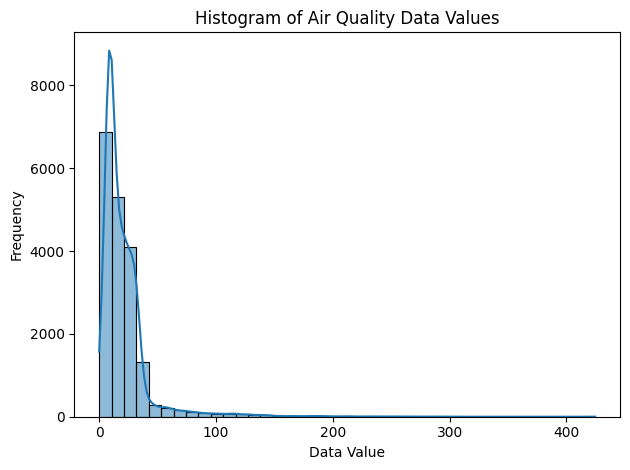

In [53]:
sns.histplot(df['Data Value'], bins=40, kde=True)
plt.title('Histogram of Air Quality Data Values')
plt.xlabel('Data Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

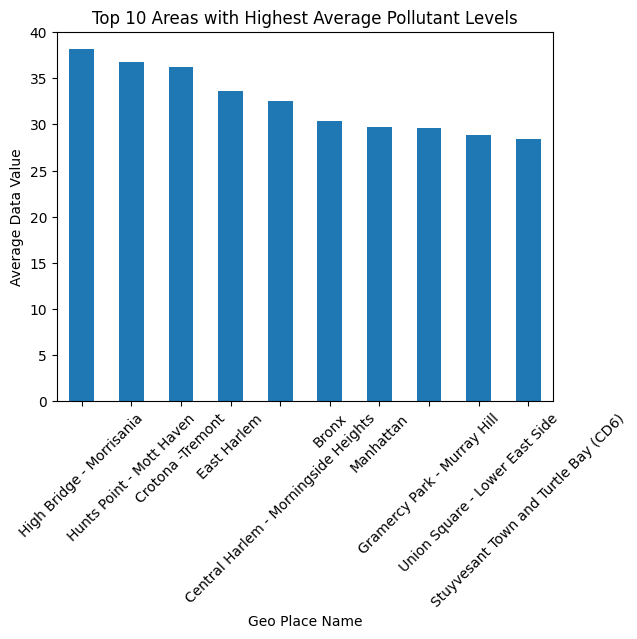

In [52]:
avg_per_area = df.groupby('Geo Place Name')['Data Value'].mean().sort_values(ascending=False).head(10)
avg_per_area.plot(kind='bar')
plt.title('Top 10 Areas with Highest Average Pollutant Levels')
plt.ylabel('Average Data Value')
plt.xticks(rotation=45)
plt.show()


<ipython-input-57-fa260b6b5745>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  no2_monthly = no2_df.groupby(pd.Grouper(key='Start_Date', freq='M'))['Data Value'].mean()


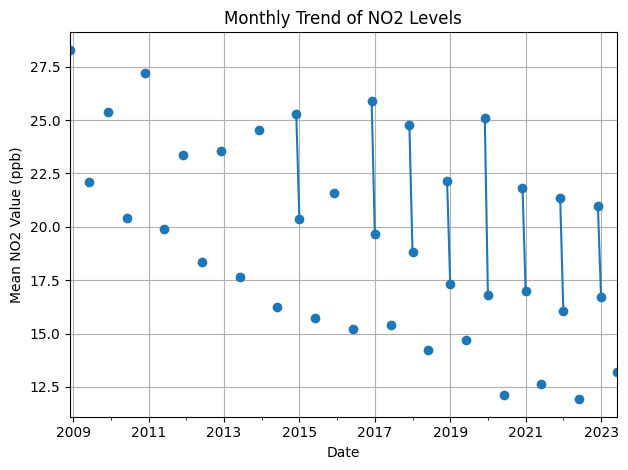

In [57]:
df['Start_Date'] = pd.to_datetime(df['Start_Date'])

no2_df = df[df['Name'] == 'Nitrogen dioxide (NO2)']
no2_monthly = no2_df.groupby(pd.Grouper(key='Start_Date', freq='M'))['Data Value'].mean()
no2_monthly.plot(marker='o')
plt.title('Monthly Trend of NO2 Levels')
plt.xlabel('Date')
plt.ylabel('Mean NO2 Value (ppb)')
plt.grid(True)
plt.tight_layout()
plt.show()

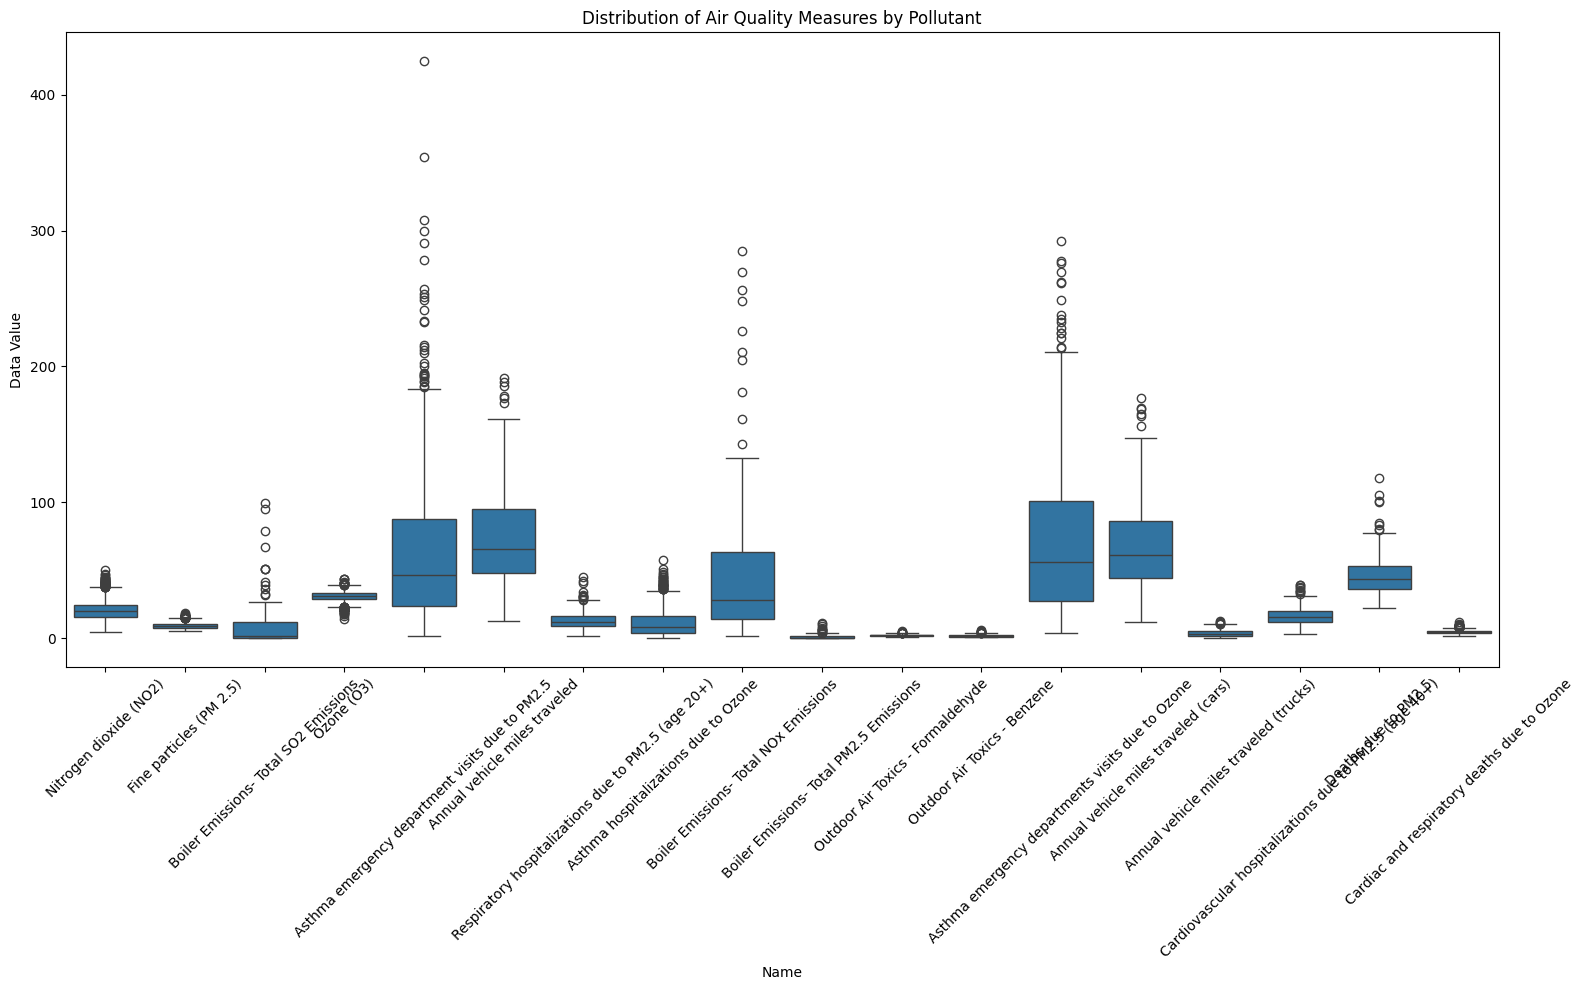

In [58]:
plt.figure(figsize=(16, 10))
sns.boxplot(x='Name', y='Data Value', data=df)
plt.title('Distribution of Air Quality Measures by Pollutant')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


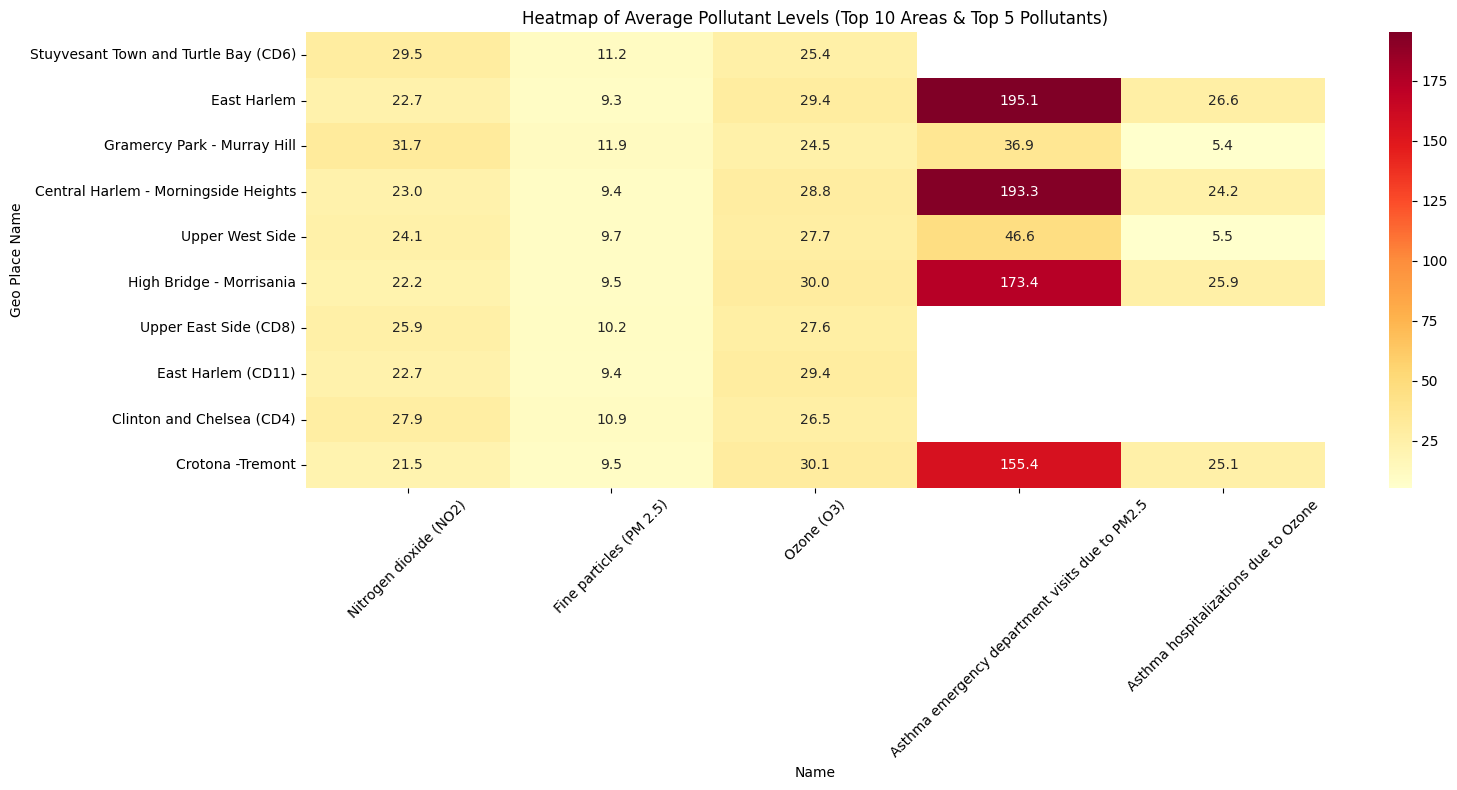

In [54]:
pivot_table = df.pivot_table(values='Data Value', index='Geo Place Name', columns='Name', aggfunc='mean')
top_areas = pivot_table.mean(axis=1).sort_values(ascending=False).head(10).index
top_pollutants = df['Name'].value_counts().head(5).index
filtered_data = pivot_table.loc[top_areas, top_pollutants]

plt.figure(figsize=(16, 8))
sns.heatmap(filtered_data, annot=True, fmt=".1f", cmap='YlOrRd')
plt.title('Heatmap of Average Pollutant Levels (Top 10 Areas & Top 5 Pollutants)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


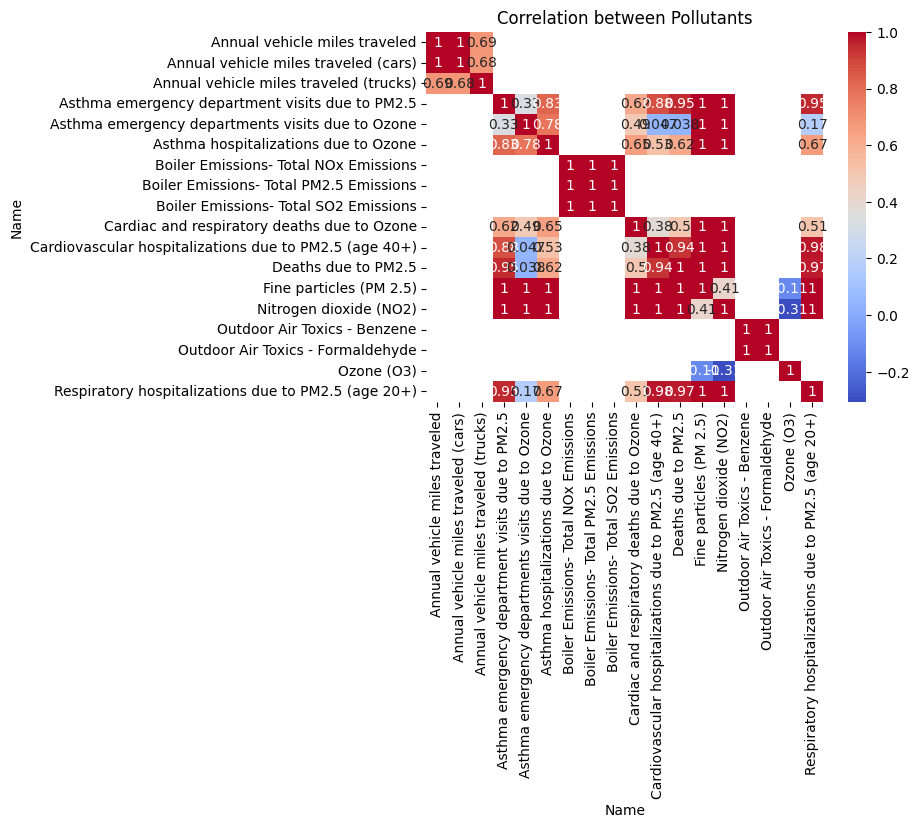

In [48]:
pivot = df.pivot_table(values='Data Value', index='Start_Date', columns='Name', aggfunc='mean')
correlation = pivot.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Pollutants')
plt.show()


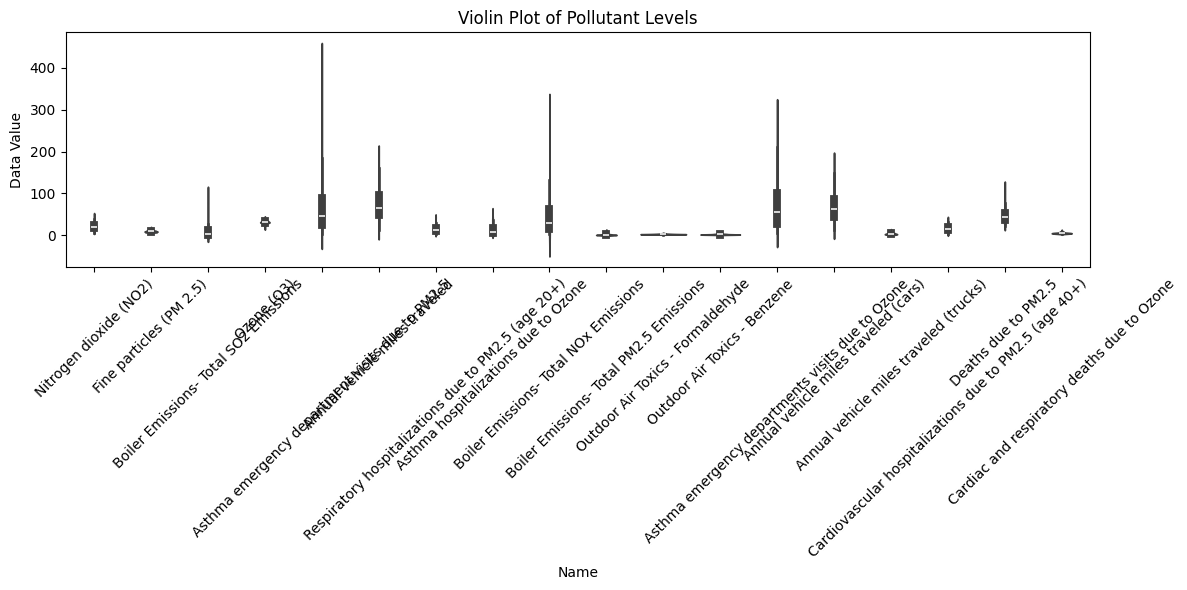

In [55]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Name', y='Data Value', data=df)
plt.title('Violin Plot of Pollutant Levels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

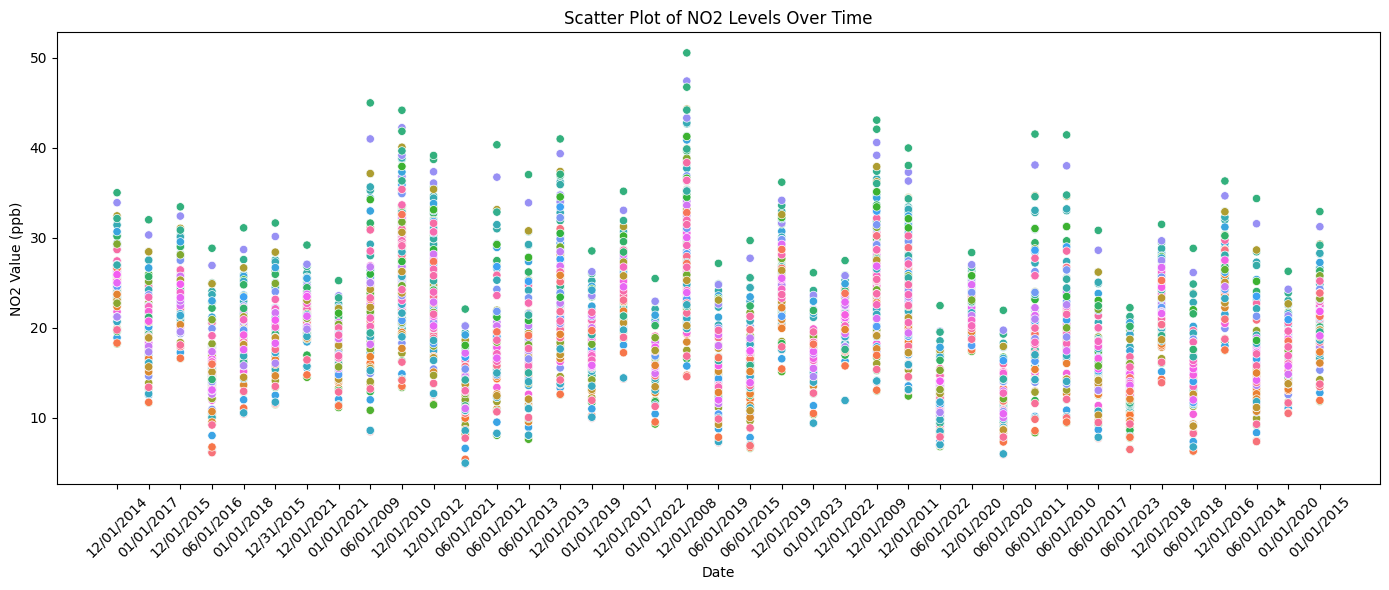

In [56]:
no2_df = df[df['Name'] == 'Nitrogen dioxide (NO2)']

plt.figure(figsize=(14, 6))
sns.scatterplot(data=no2_df, x='Start_Date', y='Data Value', hue='Geo Place Name', legend=False)
plt.title('Scatter Plot of NO2 Levels Over Time')
plt.xlabel('Date')
plt.ylabel('NO2 Value (ppb)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


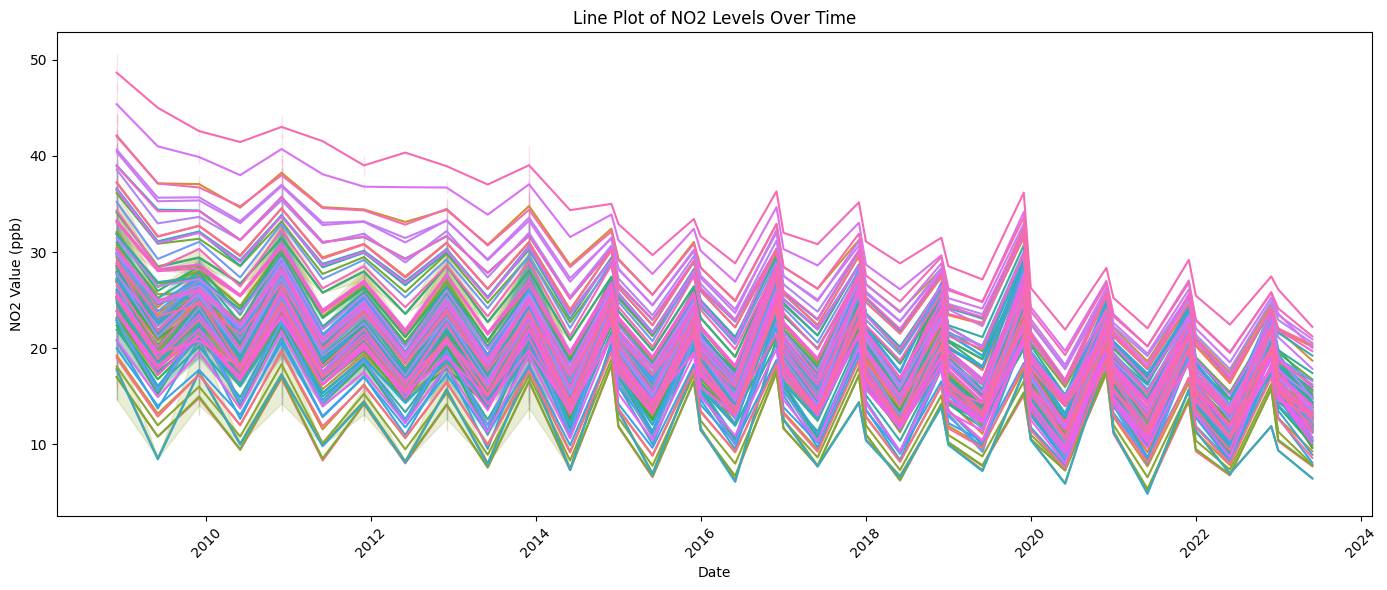

In [43]:
no2_df = df[df['Name'] == 'Nitrogen dioxide (NO2)']
no2_df = no2_df.sort_values('Start_Date')

plt.figure(figsize=(14, 6))
sns.lineplot(data=no2_df, x='Start_Date', y='Data Value', hue='Geo Place Name', legend=False)
plt.title('Line Plot of NO2 Levels Over Time')
plt.xlabel('Date')
plt.ylabel('NO2 Value (ppb)')
plt.xticks(rotation=45)
plt.show()


<ipython-input-51-f7da6d657d0e>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  series = no2_df.set_index('Start_Date')['Data Value'].resample('M').mean()
<ipython-input-51-f7da6d657d0e>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  series = series.asfreq('M')
<ipython-input-51-f7da6d657d0e>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = series.fillna(method='ffill') # For example, forward fill


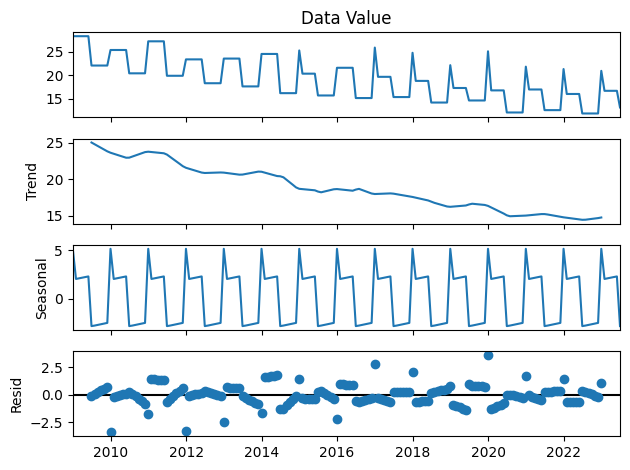

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Resample and explicitly set frequency
series = no2_df.set_index('Start_Date')['Data Value'].resample('M').mean()
# Ensure the index is a DatetimeIndex with a monthly frequency
series = series.asfreq('M')
# Instead of using dropna(), fill missing values using a suitable method to maintain frequency
series = series.fillna(method='ffill') # For example, forward fill

# Perform seasonal decomposition, explicitly providing the period
decomposition = seasonal_decompose(series, model='additive', period=12)  # Assuming monthly data, period=12
decomposition.plot()
plt.show()